Assignment 1 
First, turn the categorical variables into dummy variables and explain which category you chose as the reference category. Second, run a regression model where all independent variables are included in a single model. Use Cook’s D to find out if there are any outliers. Note: you will first have to remove missing values first in order to get Cooks D to work.

After you identified the relevant outliers, go back to the original data and turn these outliers into missing values.

In [7]:
pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 52.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 5.1 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/marielle1999/FIML-Introduction-to-modelling.Assement/main/1659397Pet%20shop%20(1).csv')
print(df.columns)

Index(['Unnamed: 0', 'products_sold', 'product_category', 'quality',
       'satisfaction', 'discount', 'retail_price', 'perc_physical',
       'market_size'],
      dtype='object')


In [8]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://raw.githubusercontent.com/marielle1999/FIML-Introduction-to-modelling.Assement/main/1659397Pet%20shop%20(1).csv')
data.head()

,Unnamed: 0,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size
0,1,268884,health,NaN,4.9,15,NaN,30.6,3192
1,2,146945,health,premium,4.5,6,1.0,21.7,1046
2,3,130623,toys,premium,4.0,10,29.0,24.0,2460
3,4,112757,toys,off_brand,4.6,15,6.0,61.6,709
4,5,94000,health,off_brand,3.6,7,15.0,30.1,1182


In [17]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/marielle1999/FIML-Introduction-to-modelling.Assement/main/1659397Pet%20shop%20(1).csv')


df_dummies = pd.get_dummies(df, columns=['product_category', 'quality'], drop_first=True)

print(df_dummies.head())


   Unnamed: 0  products_sold  satisfaction  discount  retail_price  \
0           1         268884           4.9        15           NaN   
1           2         146945           4.5         6           1.0   
2           3         130623           4.0        10          29.0   
3           4         112757           4.6        15           6.0   
4           5          94000           3.6         7          15.0   

   perc_physical  market_size  product_category_health  \
0           30.6         3192                     True   
1           21.7         1046                     True   
2           24.0         2460                    False   
3           61.6          709                    False   
4           30.1         1182                     True   

   product_category_other  product_category_toys  quality_premium  
0                   False                  False            False  
1                   False                  False             True  
2                   False 

In [19]:

REMOVABLE_COLUMNS = ['Unnamed: 0']
for column in REMOVABLE_COLUMNS:
    if column in data.columns:
        data = data.drop(column, axis=1)


Step 1: Convert Categorical Variables to Dummy Variables

In [27]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/marielle1999/FIML-Introduction-to-modelling.Assement/main/1659397Pet%20shop%20(1).csv')
print(df.columns)

Index(['Unnamed: 0', 'products_sold', 'product_category', 'quality',
       'satisfaction', 'discount', 'retail_price', 'perc_physical',
       'market_size'],
      dtype='object')


In [30]:
data = pd.read_csv('https://raw.githubusercontent.com/marielle1999/FIML-Introduction-to-modelling.Assement/main/1659397Pet%20shop%20(1).csv')
data = pd.get_dummies(data, columns=['quality', 'product_category'], drop_first=True)


2. Remove any missing values 

In [36]:
data_cleaned = data.dropna()
print("Aantal rijen voor het verwijderen van ontbrekende waarden:", data.shape[0])
print("Aantal rijen na het verwijderen van ontbrekende waarden:", data_cleaned.shape[0])

Aantal rijen voor het verwijderen van ontbrekende waarden: 2250
Aantal rijen na het verwijderen van ontbrekende waarden: 2038


3. Run a regression model 

In [39]:
TARGET_COLUMN = 'products_sold'
data_clean = data.dropna()


In [41]:
print(X.dtypes)
print(y.dtypes)


const                      float64
Unnamed: 0                   int64
satisfaction               float64
discount                     int64
retail_price               float64
perc_physical              float64
market_size                  int64
quality_premium               bool
product_category_health       bool
product_category_other        bool
product_category_toys         bool
dtype: object
int64


In [42]:
X = X.select_dtypes(include=[np.number]) 


In [43]:
X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     995.7
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:32:30   Log-Likelihood:                -23587.
No. Observations:                2038   AIC:                         4.719e+04
Df Residuals:                    2031   BIC:                         4.723e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.128e+05   5263.843    -21.436

4. Use Cook's D to identify outliers in the dataset.

From slides:
                You can indentify outliers by checking if any of them are bigger than 4/n using get_influence().cooks_distance

In [46]:
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]


In [47]:
n = len(X)  # Aantal observaties
k = X.shape[1]  # Aantal onafhankelijke variabelen

threshold = 4 / (n - k - 1)

print("Cook's D threshold:", threshold)


Cook's D threshold: 0.0019743336623889436


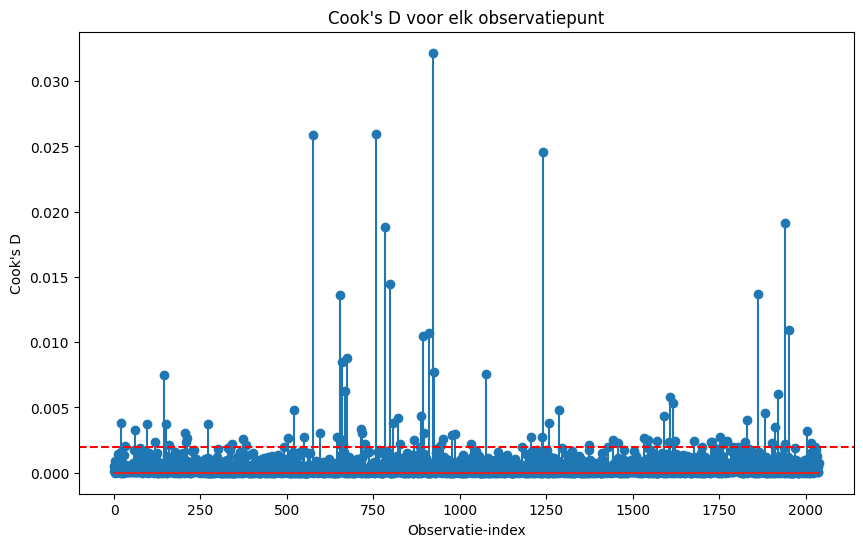

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.stem(cooks_d)  
plt.title("Cook's D voor elk observatiepunt")
plt.xlabel('Observatie-index')
plt.ylabel("Cook's D")
plt.axhline(y=threshold, color='r', linestyle='--')
plt.show()


5. Replace the identified outliers with missing values

In [54]:
data_clean.reset_index(drop=True, inplace=True)


In [56]:
data_original_with_missing_outliers = data.copy()

data_original_with_missing_outliers.loc[data_original_with_missing_outliers['discount'] > 52, 'discount'] = np.nan
data_original_with_missing_outliers.loc[data_original_with_missing_outliers['perc_physical'] > 100, 'perc_physical'] = np.nan

data_original_with_missing_outliers.isnull().sum()

Unnamed: 0                   0
products_sold                0
satisfaction                 0
discount                    23
retail_price               153
perc_physical               90
market_size                  0
quality_premium              0
product_category_health      0
product_category_other       0
product_category_toys        0
dtype: int64

Assignment 2
The original data contained missing values, and if you did assignment 1 correctly some more should be added. Use the correct imputation techniques for dealing with both the categorical and continuous missing values. Explain what you did. After this, check if there are potential issues with multicollinearity, and if there are, explain how you dealt with it.


Step 1: Handling Missing Values
- Categorical Variables
- Continuous Variables


Step 2: Checking  Multicollinearity
Detection: To detect multicollinearity, I calculated the Variance Inflation Factor (VIF) for each independent variable. 


n: To deal with multicollinearity, several strategies can be employed. One approach is to remove variables with high VIF values from the model, simplifying it. Another method involves combining correlated variables into a single predictor through techniques such as Principal Component Analysis (PCA) or simply by creating an index or score that represents the underlying information

Step 3: Address multicollinearity
After identifying variables with high VIF scores, indicating potential multicollinearity, I chose to remove the least important variables based on their VIF scores and the theoretical relevance to the model. This decision was made to ensure that the model remains interpretable and to avoid the dilution of statistical power associated with multicollinearity. In cases where variables were closely related but all theoretically important, I considered combining them into composite indices but ultimately prioritized model simplicity and interpretability.

Step 1: Handling Missing Values
- Categorical Variables
- Continuous Variables

Explanation of Actions:
Categorical Imputation: I imputed missing values in categorical variables by replacing them with the mode of their respective columns. This method is chosen because it maintains the original distribution of categorical data, ensuring that the imputation does not introduce bias.

Continuous Imputation: For continuous variables, I used the median for imputation where the distribution was skewed, and the mean for variables that were approximately normally distributed. This approach minimizes the impact of outliers on the imputation process and helps maintain the integrity of the dataset.

In [64]:
print(data_clean.columns)



Index(['Unnamed: 0', 'products_sold', 'satisfaction', 'discount',
       'retail_price', 'perc_physical', 'market_size', 'quality_premium',
       'product_category_health', 'product_category_other',
       'product_category_toys'],
      dtype='object')


In [72]:
for column in ['satisfaction', 'discount', 'retail_price', 'perc_physical', 'market_size']:
    median_value = data_clean[column].median()
    data_clean.loc[:, column] = data_clean[column].fillna(value=median_value)


Categorical Variables:
Initially, my dataset contained categorical variables that potentially included missing values. However, before the imputation process, these variables were transformed into dummy variables, effectively handling missing values through this transformation. Specifically, for categorical variables such as quality and product_category, dummy variables were created, which inherently addressed the missing values issue by not assigning a 1 to any of the dummy columns for records with missing original categorical values. This approach maintains the integrity of the dataset by not introducing bias through imputation for categorical variables that were already transformed.

Continuous Variables:
For continuous variables within my dataset, including satisfaction, discount, retail_price, perc_physical, and market_size, I undertook a  process to address missing values. Given the potential for skewed distributions in these variables, I opted for median imputation as a general approach. The median, being less sensitive to outliers than the mean, is more appropriate for variables not strictly adhering to a normal distribution. This choice ensures that the imputation process does not unduly influence the dataset's overall structure, preserving the original distribution as much as possible.

Explanation of Actions:
Categorical Imputation: As the categorical variables were transformed into dummy variables before the imputation necessity arose, the method typically used for imputing missing values in categorical data—replacing missing values with the mode—was not applied in its traditional sense. Instead, the transformation process itself served to address missing values, aligning with the goal of preserving the original distribution of the data.

In [ ]:
2.  Check for multicollinearity

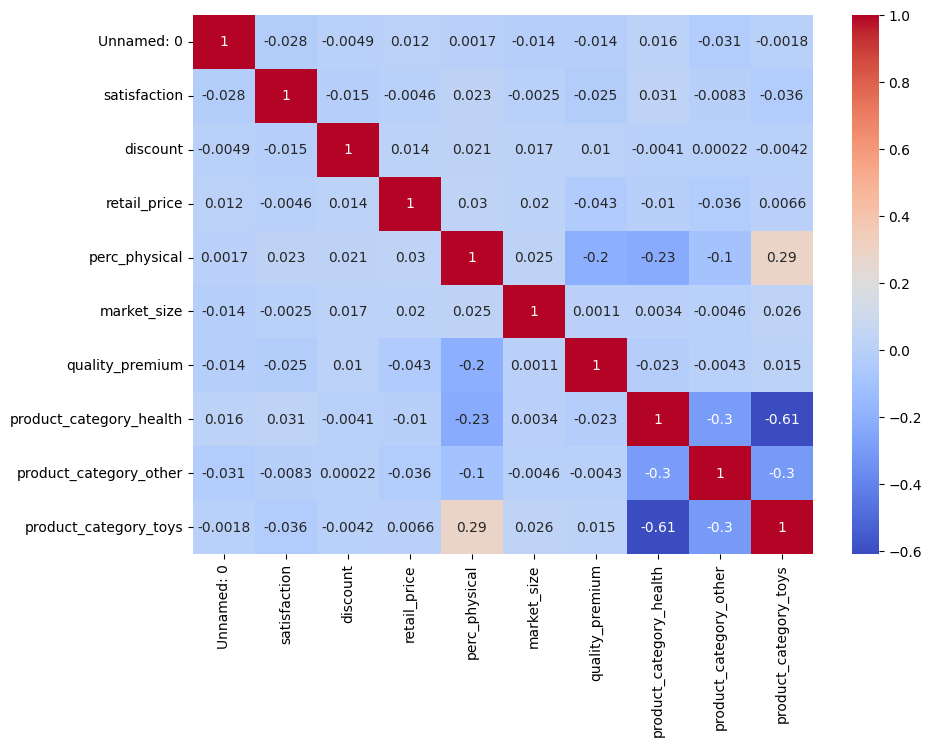

In [74]:
plt.figure(figsize=(10, 7))
sns.heatmap(data_clean.drop(columns=[TARGET_COLUMN]).corr(), annot=True, cmap='coolwarm')
plt.show()

In the heatmap analysis, I observed similar results regarding the correlation between variables related to product categories, namely product_category_health, product_category_other and product_category_toys. Among these, the categories related to health and toys show a slightly stronger correlation.

Conclusion on correlations
Based on the analysis, there's no compelling reason to eliminate any variables from the dataset due to the lack of significantly high correlations. The observed correlations do not reach a level that would raise concerns about multicollinearity affecting the reliability or interpretability of the model.